## WeatherPy 
-----
What's the weather like as we approach the equator? 

Using Python requests, APIs, and JSON traversals we generated 500+ random latitudes and longitudes with the [Citypy Python library](https://pypi.python.org/pypi/citipy) and the [OpenWeatherMap API](https://openweathermap.org/api), with API keys to retrieve and graph scatter plots to showcase the following relationships:

* Latitude vs. Temperature (F) 
* Latitude vs. Humidity (%)
* Latitude vs. Cloudiness (%)
* Latitude vs. Wind Speed (mph)
* Latitude vs. Longitude (for fun and to see the distribution of the data)

### Analysis
----
 - Ta-da! As one would expect as you approach the equator the temperature increases. 
 - During the end of the calendar year, i.e., November, the temperature is cooler in the Northern hemisphere, where latitudes are greater than 0 and the temperature is warmer in the Southern hemisphere, where latitudes are less than 0.
 - There was no relationship between latitude and humidity, cloudiness and wind speed. However, the data suggest that there are more cities with a relative humidity greater than 50% and wind speed less than 15 mph, which would be an interesting analysis. 
 - The majority of the cities generated are in the Northern hemisphere.

## Generate Cites List from Lats and Longs

In [2]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()


index      658
City       658
Country    658
dtype: int64

## Perform API Calls

In [3]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Castro BR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=castro
------------------------
Proceesing: City #  2  |  Balclutha NZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kaitangata
------------------------
Proceesing: City #  3  |  Kashechewan CA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=attawapiskat
------------------------
Proceesing: City #  4  |  Bredasdorp ZA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=bredasdorp
------------------------
Proceesing: City #  5  |  Ushuaia AR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ushuaia
------------------------
Proceesing: City #  6  |  Tiksi RU
http://api.openweathermap.org/da

In [4]:
clean_cities_df.count()

City                592
Country             592
Temperature (F)     592
Latitude            592
Longitude           592
Humidity (%)        592
Cloudiness (%)      592
Wind Speed (mph)    592
dtype: int64

In [5]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Castro,BR,67.83,-24.79,-50.01,90,92,7.83
1,Balclutha,NZ,53.97,-46.23,169.75,92,0,6.82
2,Kashechewan,CA,22.56,52.3,-81.62,83,76,11.18
3,Bredasdorp,ZA,59,-34.53,20.04,77,0,4.7
4,Ushuaia,AR,33.8,-54.8,-68.3,98,90,26.4
5,Tiksi,RU,7.71,71.69,128.87,90,64,3.91
6,East London,ZA,66.48,-33.02,27.91,100,0,5.82
7,Albany,US,42.1,42.65,-73.76,72,90,14.99
8,Port Blair,IN,83.71,11.67,92.75,100,0,3.13
9,Pidhorodne,UA,33.8,48.58,35.11,96,90,6.71


In [6]:
# Save data to a CSV file
clean_cities_df.to_csv("WeatherPy_analysis/City_Data.csv")

## Latitude vs. Temperature 

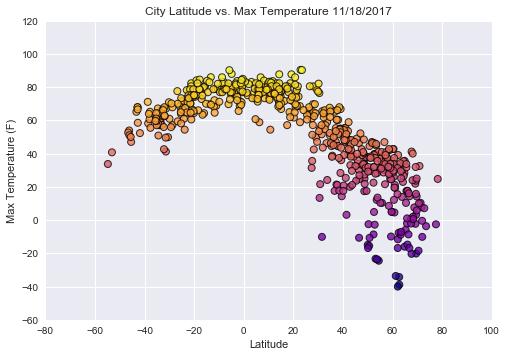

In [10]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity (%) 

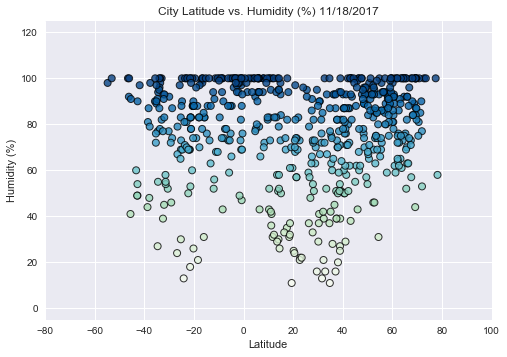

In [12]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness (%) 

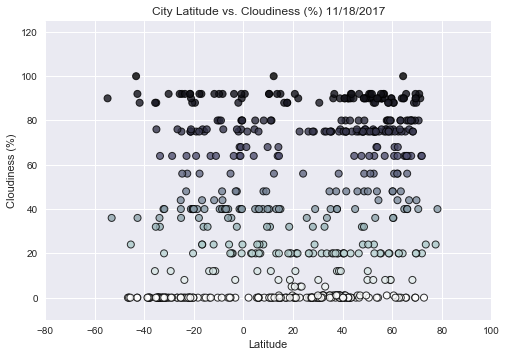

In [13]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed (mph)

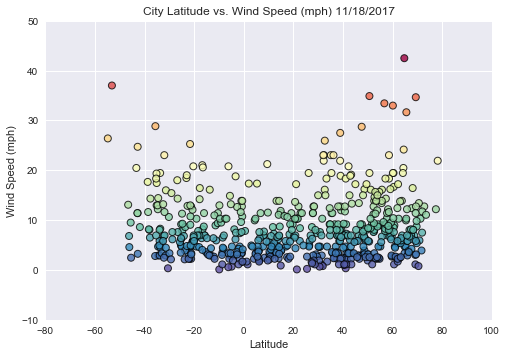

In [14]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()

## Latitude vs. Longitude

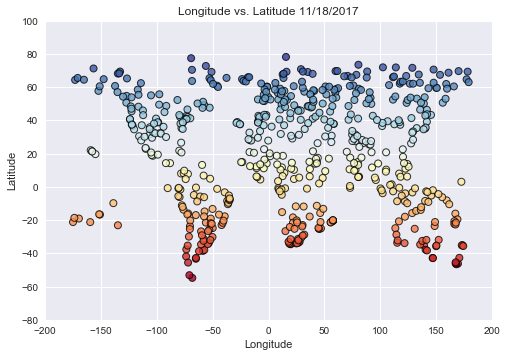

In [15]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Longitude.png")

# Show plot
plt.show()